# Deep Learning in Python Chapter 2

## MNIST

Lets do this thing

In [5]:
from tensorflow.keras.datasets import mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Building the network architecture

In [51]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

here I make two layers, there are three layers then. 
- The first which is the input, (not pictured)
- The second which is a layer that uses rectified linear unit as the activation operation.
    - This means that it is using relu which is an _ELEMENT-WISE_ operation, which is applied independently to each entry, meaning it can easily be parallelilizled. Here it takes the max of the weight and uses that.
    - From a cursory look as to why use relu even? it allows training to work better. Allows backprop to figure out which weights to change faster and allows gradient descent to choose what to modify much better.
- The third and last which is the output and softmax layer which lets us know which is the predicted digit, It''s softmax because it has to be somewhat legible to us humans

In [56]:
model.compile(
    optimizer="rmsprop", 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)

Now we choose the optimizer, this will allow us to update the weights, but by how much? and what are we focusing on?

In [53]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28))  
test_images = test_images.astype("float32") / 255

We load the training images in and convert them into arrays, tensors that we can actually run through.

## Training the model

In [54]:
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=128)
history

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1082 - loss: 2.3018    
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1086 - loss: 2.3017
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1114 - loss: 2.3013
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1104 - loss: 2.3013
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1087 - loss: 2.3019
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1104 - loss: 2.3016
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1103 - loss: 2.3016
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1102 - loss: 2.3014
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1143 - loss: 2.3010
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1129 - loss: 2.3011 


We run 5 epochs of the model and train it on the images and the labels, Let's visualize our accuracy

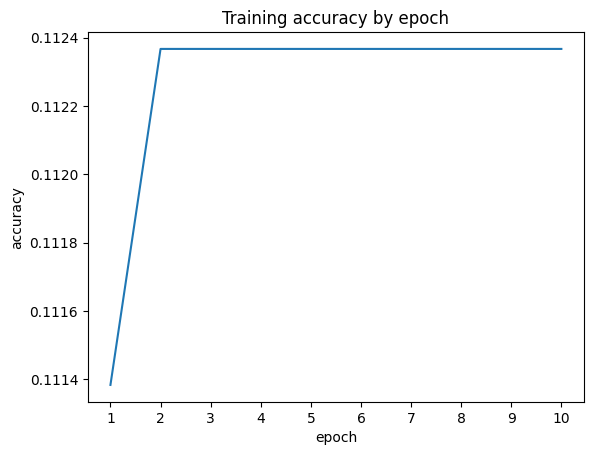

In [55]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
epoch_n = range(1, len(accuracy) + 1)
plt.plot(epoch_n, accuracy)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xticks(epoch_n)
plt.title("Training accuracy by epoch")
plt.show()

Now lets see how we did on our new test data

## Testing the model

In [41]:
test_digits = test_images[0:10] 
predictions = model.predict(test_digits)
[print("pred:", predictions[i].argmax(), 
       "label:", test_labels[i], 
       predictions[i].argmax() == test_labels[i]  ) for i in range(len(predictions))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
pred: 7 label: 7 True
pred: 2 label: 2 True
pred: 1 label: 1 True
pred: 0 label: 0 True
pred: 4 label: 4 True
pred: 1 label: 1 True
pred: 4 label: 4 True
pred: 9 label: 9 True
pred: 6 label: 5 False
pred: 9 label: 9 True


[None, None, None, None, None, None, None, None, None, None]

## Evaluating the model

In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.8731 - loss: 0.4649
test_acc: 0.8912000060081482
